<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-teammexcol/blob/main/Reto_Proyecto_Final/TeamMexCol_A_Subterraneas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Ciencia y analítica de datos**
###Tecnológico de Monterrey
###Profesor: Roberto Antonio Guevara González

**Nombres y matrículas de los integrantes del equipo:**

*   Victor Alejandro Regueira Romero (A01794404)
*   Carlos Julio León Caicedo (A01793947)

# **Entrega 1: 16 de noviembre**

## **Limpieza, análisis, visualización**

En esta base de datos encontrarás:
* Aguas subterraneas.
* Aguas superficiales.

1. Elige una base de datos, ya sea la de aguas superficiales o la de aguas subterraneas.

2. Explorar los datos (auxiliate de describe(), mean(), plot, boxplot de pandas):
* Identificando tendencias centrales promedio, media y mediana de los datos. 
* Identificar medidas de dispersión, máximo, mínimo .
* Identificar medidas de posición no centrales , los cuartiles , outliers.   
* Identificar correlaciones.
* Preparar los datos 
* Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.
* Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.

### Importamos las librerías a utilizar

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from sklearn.model_selection import train_test_split #Para hacer las particiones
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score         
from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier #Esta tambien la usamoie en el ejercicio 5e
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor


In [ ]:
#Instalamos libreria para trabajar con mapas
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 6.8 MB/s 
     |████████████████████████████████| 1.0 MB 38.4 MB/s 
     |████████████████████████████████| 1.7 MB 45.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 63.7 MB/s 
     |████████████████████████████████| 6.3 MB 48.6 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=5fabd0a8094b89db7f073d58a3a6ba7a250f6a02c7b8afac7ef0859a44dcc68b
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=e24c2daa7e32ccf1999312d0587f964a08fc450a6ec48054c18711bc49da21dc
  Stored in directory: /root/.

In [ ]:
import geopandas as gpd
from shapely.geometry import Point


### Importamos los datos

In [ ]:
#Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv
#Usamos el url de  nuestro Dataset subido al Github
url = 'https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-teammexcol/main/Reto_Proyecto_Final/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'
df_sub_origen = pd.read_csv(url, encoding = 'latin1')
df_sub_origen.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


### Análisis general de los datos

In [ ]:
df_agua_sub = df_sub_origen.copy()
df_agua_sub.sample(7)

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
892,OCPBC4316,POZO NO. 273,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA,ENSENADA,GUADALUPE,POZO,-116.501111,32.110833,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
118,DLCOA475,POZO TANQUE NUEVO,CUENCAS CENTRALES DEL NORTE,COAHUILA DE ZARAGOZA,PARRAS,GENERAL CEPEDA-SAUCEDA,POZO,-101.728790,25.262410,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
182,DLDUR5406,POZO LAS DELICIAS,CUENCAS CENTRALES DEL NORTE,DURANGO,INDE,BUENOS AIRES,POZO,-105.046580,25.693620,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
119,DLCOA476,POZO RANCHO EL NOGAL,RIO BRAVO,COAHUILA DE ZARAGOZA,RAMOS ARIZPE,SALTILLO-RAMOS ARIZPE,POZO,-100.893750,25.611080,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,NO
722,OCGCE3326,HOTEL JARAGUA S. A. DE C.V. (POZO 1),GOLFO CENTRO,VERACRUZ DE IGNACIO DE LA LLAVE,BOCA DEL RIO,COSTERA DE VERACRUZ,POZO,-96.105010,19.150720,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
876,OCNOR4230,POZO CAMPO TODOS SANTOS,NOROESTE,SONORA,HERMOSILLO,COSTA DE HERMOSILLO,POZO,-111.387880,28.684380,2020,...,SI,NO,SI,SI,SI,SI,SI,SI,SI,SI
995,OCPYU4962,POZO 10 CENTRO DEPORTIVO DEL SUR (COMPAÑIA EMB...,PENINSULA DE YUCATAN,YUCATAN,MERIDA,PENINSULA DE YUCATAN,POZO,-89.656680,20.899730,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [ ]:
df_agua_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

* El Dataset tiene valores nulos, esto lo vemos al observar el número de registros que tiene cada variable.
* Tenemos un total de **57 variables** y **1068 registros**
* Nuestras variables son tipo flotante, entero y objeto (*Debemos de hacer un análisis más a profundidad de esas variables objeto*)

### Análisis de Nulos

In [ ]:
df_agua_sub.isna().sum().sort_values(ascending=False) #los nulos de forma descendente


SDT_mg/L                1068
CONTAMINANTES            434
CALIDAD_CONDUC             6
CONDUCT_mS/cm              6
ALC_mg/L                   4
CALIDAD_ALC                4
CALIDAD_SDT_ra             2
SDT_M_mg/L                 2
CALIDAD_SDT_salin          2
CALIDAD_N_NO3              1
CALIDAD_DUR                1
N_NO3_mg/L                 1
DUR_mg/L                   1
CUMPLE_CON_COND            0
CUMPLE_CON_ALC             0
SEMAFORO                   0
CALIDAD_FE                 0
FE_TOT_mg/L                0
CALIDAD_MN                 0
CUMPLE_CON_SDT_ra          0
CUMPLE_CON_SDT_salin       0
CLAVE                      0
CUMPLE_CON_FLUO            0
CUMPLE_CON_DUR             0
CALIDAD_PB                 0
CUMPLE_CON_CF              0
CUMPLE_CON_NO3             0
CUMPLE_CON_AS              0
CUMPLE_CON_CD              0
CUMPLE_CON_CR              0
CUMPLE_CON_HG              0
CUMPLE_CON_PB              0
CUMPLE_CON_MN              0
MN_TOT_mg/L                0
CD_TOT_mg/L   

* Todos los datos de **SDT_mg/L** son nulos.
* El 40.63% de los datos de **CONTAMINANTES** es nulo.
* Las demás variables tienen muy pocos datos nulos --> Se optará por imputarlos más adelante 

In [ ]:
df_agua_sub.groupby(by = ['CONTAMINANTES', 'SEMAFORO']).mean()

,,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
CONTAMINANTES,SEMAFORO,,,,,,
"ALC,",Amarillo,-96.962251,19.280590,2020.0,462.535556,1223.888889,NaN
"ALC,AS,FE,",Rojo,-105.363490,25.970000,2020.0,410.700000,602.000000,NaN
"ALC,AS,MN,FE,",Rojo,-107.981533,26.235678,2020.0,414.955000,1297.000000,NaN
"ALC,CF,",Rojo,-100.623300,21.703160,2020.0,455.520000,925.000000,NaN
"ALC,CONDUC,",Amarillo,-99.349550,20.153822,2020.0,416.380000,2860.000000,NaN
...,...,...,...,...,...,...,...
"SDT_ra,SDT_salin,DT,CR,",Rojo,-97.584348,17.689281,2020.0,210.000000,1985.000000,NaN
"SDT_ra,SDT_salin,DT,FE,",Amarillo,-116.247378,31.013624,2020.0,266.475000,1520.000000,NaN
"SDT_ra,SDT_salin,DT,MN,",Amarillo,-116.279120,31.413813,2020.0,243.136667,1640.000000,NaN


Es importante ver la relación entre CONTAMINANTES con las demás variables, se observa que esta variable es un conjunto de otras variables que se mencionan en el DataSet.

Debido a que las variables categóricas con valores [SI, NO] son solamente un resumen de lo obtenido a través de las variables numéricas, consideraremos únicamente las variables numéricas para realizar el análisis exploratorio.

### Asignación de variables

In [ ]:
#Columnas numéricas
col_num = ['ALC_mg/L','CONDUCT_mS/cm','SDT_mg/L','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']

df_agua_sub_num = df_agua_sub[col_num]
df_agua_sub_num.sample(10)


,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
528,229.000,1028.0,NaN,636,0.297,346,<1.1,15.992,<0.01,<0.003,0.0221,<0.0005,<0.005,0.00337,0.04023
280,70.670,217.0,NaN,184,0.4307,96.71,40,1.3703,<0.01,<0.003,<0.005,<0.0005,<0.005,0.00193,0.13149
68,304.650,2595.0,NaN,1699,0.489,773.65,<1.1,8.3893,<0.01,<0.003,<0.005,<0.0005,<0.005,0.002,<0.025
190,147.630,350.0,NaN,211,1.3433,25.7296,131,0.759527,0.0625,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
362,408.780,2675.0,NaN,988,0.8733,686.81,40,2.6373,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,0.2241
416,590.000,1533.0,NaN,1474,0.58,1032,<1.1,3.896,<0.01,<0.003,0.01063,0.00134,0.0086,<0.0015,0.07983
60,267.400,957.0,NaN,638,0.2462,376.96,<1.1,2.1879,<0.01,<0.003,<0.005,<0.0005,<0.005,0.0091,0.2901
439,402.000,1169.0,NaN,720,1.88,210,<1.1,2.646,<0.01,<0.003,0.011,<0.0005,<0.005,<0.0015,0.044
477,114.975,414.0,NaN,216,2.9349,53.8542,10,1.196746,<0.01,<0.003,<0.005,<0.0005,<0.005,0.012,0.1304
127,202.740,1608.0,NaN,1206.4,0.3113,595.26,<1.1,2.202746,<0.01,<0.003,<0.005,<0.0005,<0.005,0.0078,0.1881


Veamos más de cerca cada una de estas variables y cómo se distribuyen sus valores únicos. Ya que encontramos varios valores con el signo '<' al inicio de varios campos. Esto debido a que como menciona el documento *INDICADORES DE LA CALIDAD DEL AGUA SUPERFICIAL Y SUBTERRÁNEA (página 24)* existe una **Escala de clasificación de calidad** donde se muestran ciertas condiciones para cada variable.

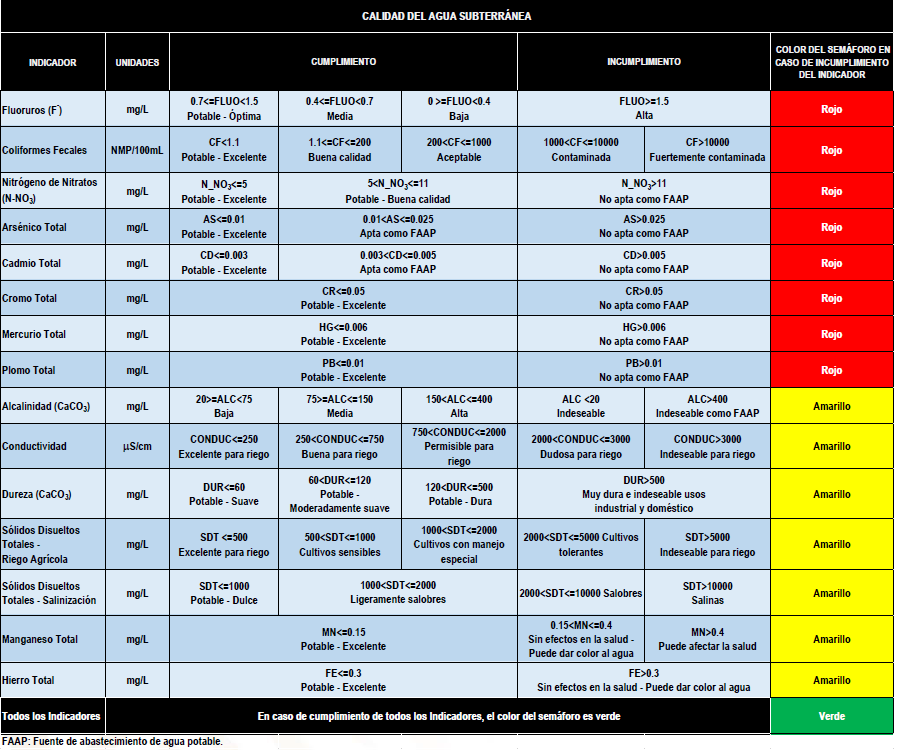

In [ ]:
for i in col_num:
  print("___COLUMNA: " + i + '___')
  print("___VALORES ÚNICOS___") 
  print(df_agua_sub_num[i].value_counts())
  print("-"*10)

___COLUMNA: ALC_mg/L___
___VALORES ÚNICOS___
157.620    5
193.815    4
195.360    4
204.765    4
257.850    4
          ..
341.000    1
151.000    1
106.000    1
99.000     1
256.000    1
Name: ALC_mg/L, Length: 816, dtype: int64
----------
___COLUMNA: CONDUCT_mS/cm___
___VALORES ÚNICOS___
777.0    6
300.0    4
412.0    4
454.0    4
308.0    4
        ..
826.0    1
876.0    1
373.0    1
733.0    1
817.0    1
Name: CONDUCT_mS/cm, Length: 801, dtype: int64
----------
___COLUMNA: SDT_mg/L___
___VALORES ÚNICOS___
Series([], Name: SDT_mg/L, dtype: int64)
----------
___COLUMNA: SDT_M_mg/L___
___VALORES ÚNICOS___
496         4
320         4
292         4
317         4
380         4
           ..
148         1
224         1
392         1
1736        1
690.6667    1
Name: SDT_M_mg/L, Length: 925, dtype: int64
----------
___COLUMNA: FLUORUROS_mg/L___
___VALORES ÚNICOS___
<0.2      162
0.466       3
0.5202      3
0.4993      2
0.482       2
         ... 
1.6185      1
0.6045      1
0.7042      1


In [ ]:
df_agua_sub_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1064 non-null   float64
 1   CONDUCT_mS/cm        1062 non-null   float64
 2   SDT_mg/L             0 non-null      float64
 3   SDT_M_mg/L           1066 non-null   object 
 4   FLUORUROS_mg/L       1068 non-null   object 
 5   DUR_mg/L             1067 non-null   object 
 6   COLI_FEC_NMP/100_mL  1068 non-null   object 
 7   N_NO3_mg/L           1067 non-null   object 
 8   AS_TOT_mg/L          1068 non-null   object 
 9   CD_TOT_mg/L          1068 non-null   object 
 10  CR_TOT_mg/L          1068 non-null   object 
 11  HG_TOT_mg/L          1068 non-null   object 
 12  PB_TOT_mg/L          1068 non-null   object 
 13  MN_TOT_mg/L          1068 non-null   object 
 14  FE_TOT_mg/L          1068 non-null   object 
dtypes: float64(3), object(12)
memory usage

In [ ]:
df_agua_sub_num['SDT_M_mg/L'].dtype

dtype('O')

Aquí podemos observar que los tipos de variables son representados como objetos al utilizar el método *info()* del DataFrame. Sin embargo, al analizar los valores de cada columna por separado, notamos que en su mayoría se encuentran datos de tipo entero y flotante, exceptuando algunos Strings que son representados con el símbolo '<'. *Debemos de considerar aplicar un cambio a estos valores*

### Cambios al Dataset

In [ ]:
#Aquí convertimos nuestros datos de tipo objeto hacia flotante, reemplazando los valores a mano

for name in col_num:
  df_agua_sub_num.loc[:,name] = df_agua_sub_num.loc[:,name].astype('str')
  df_agua_sub_num.loc[:,name] = df_agua_sub_num.loc[:,name].str.replace('<25','25') 
  df_agua_sub_num.loc[:,name] = df_agua_sub_num.loc[:,name].str.replace('<0.2','0.2') 
  df_agua_sub_num.loc[:,name] = df_agua_sub_num.loc[:,name].str.replace('<20','20') 
  df_agua_sub_num.loc[:,name] = df_agua_sub_num.loc[:,name].str.replace('<1.1','1.1')
  df_agua_sub_num.loc[:,name] = df_agua_sub_num.loc[:,name].str.replace('<0.02','0.02') 
  df_agua_sub_num.loc[:,name] = df_agua_sub_num.loc[:,name].str.replace('<0.01','0.01') 
  df_agua_sub_num.loc[:,name] = df_agua_sub_num.loc[:,name].str.replace('<0.003','0.003')
  df_agua_sub_num.loc[:,name] = df_agua_sub_num.loc[:,name].str.replace('<0.005','0.004') 
  df_agua_sub_num.loc[:,name] = df_agua_sub_num.loc[:,name].str.replace('<0.0005','0.0004') 
  df_agua_sub_num.loc[:,name] = df_agua_sub_num.loc[:,name].str.replace('<0.0015','0.0015') 
  df_agua_sub_num.loc[:,name] = df_agua_sub_num.loc[:,name].str.replace('<0.025','0.025')  
  df_agua_sub_num.loc[:,name] = df_agua_sub_num.loc[:,name].astype('float')

df_agua_sub_num.info()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1064 non-null   float64
 1   CONDUCT_mS/cm        1062 non-null   float64
 2   SDT_mg/L             0 non-null      float64
 3   SDT_M_mg/L           1066 non-null   float64
 4   FLUORUROS_mg/L       1068 non-null   float64
 5   DUR_mg/L             1067 non-null   float64
 6   COLI_FEC_NMP/100_mL  1068 non-null   float64
 7   N_NO3_mg/L           1067 non-null   float64
 8   AS_TOT_mg/L          1068 non-null   float64
 9   CD_TOT_mg/L          1068 non-null   float64
 10  CR_TOT_mg/L          1068 non-null   float64
 11  HG_TOT_mg/L          1068 non-null   float64
 12  PB_TOT_mg/L          1068 non-null   float64
 13  MN_TOT_mg/L          1068 non-null   float64
 14  FE_TOT_mg/L          1068 non-null   float64
dtypes: float64(15)
memory usage: 125.3 KB


Como se había analizado anteriormente removeremos la variable **SDT_mg/L** debido a que sólo contiene valores nulos.

In [ ]:
df_agua_sub_num.drop('SDT_mg/L', axis=1, inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Proseguiremos a imputar los valores de las variables con valores nulos que nos restan del DataSet. Para eso veamos la distribución de los datos a través de histogramas.

**Histogramas**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efeb3f8b490>,
      dtype=object)

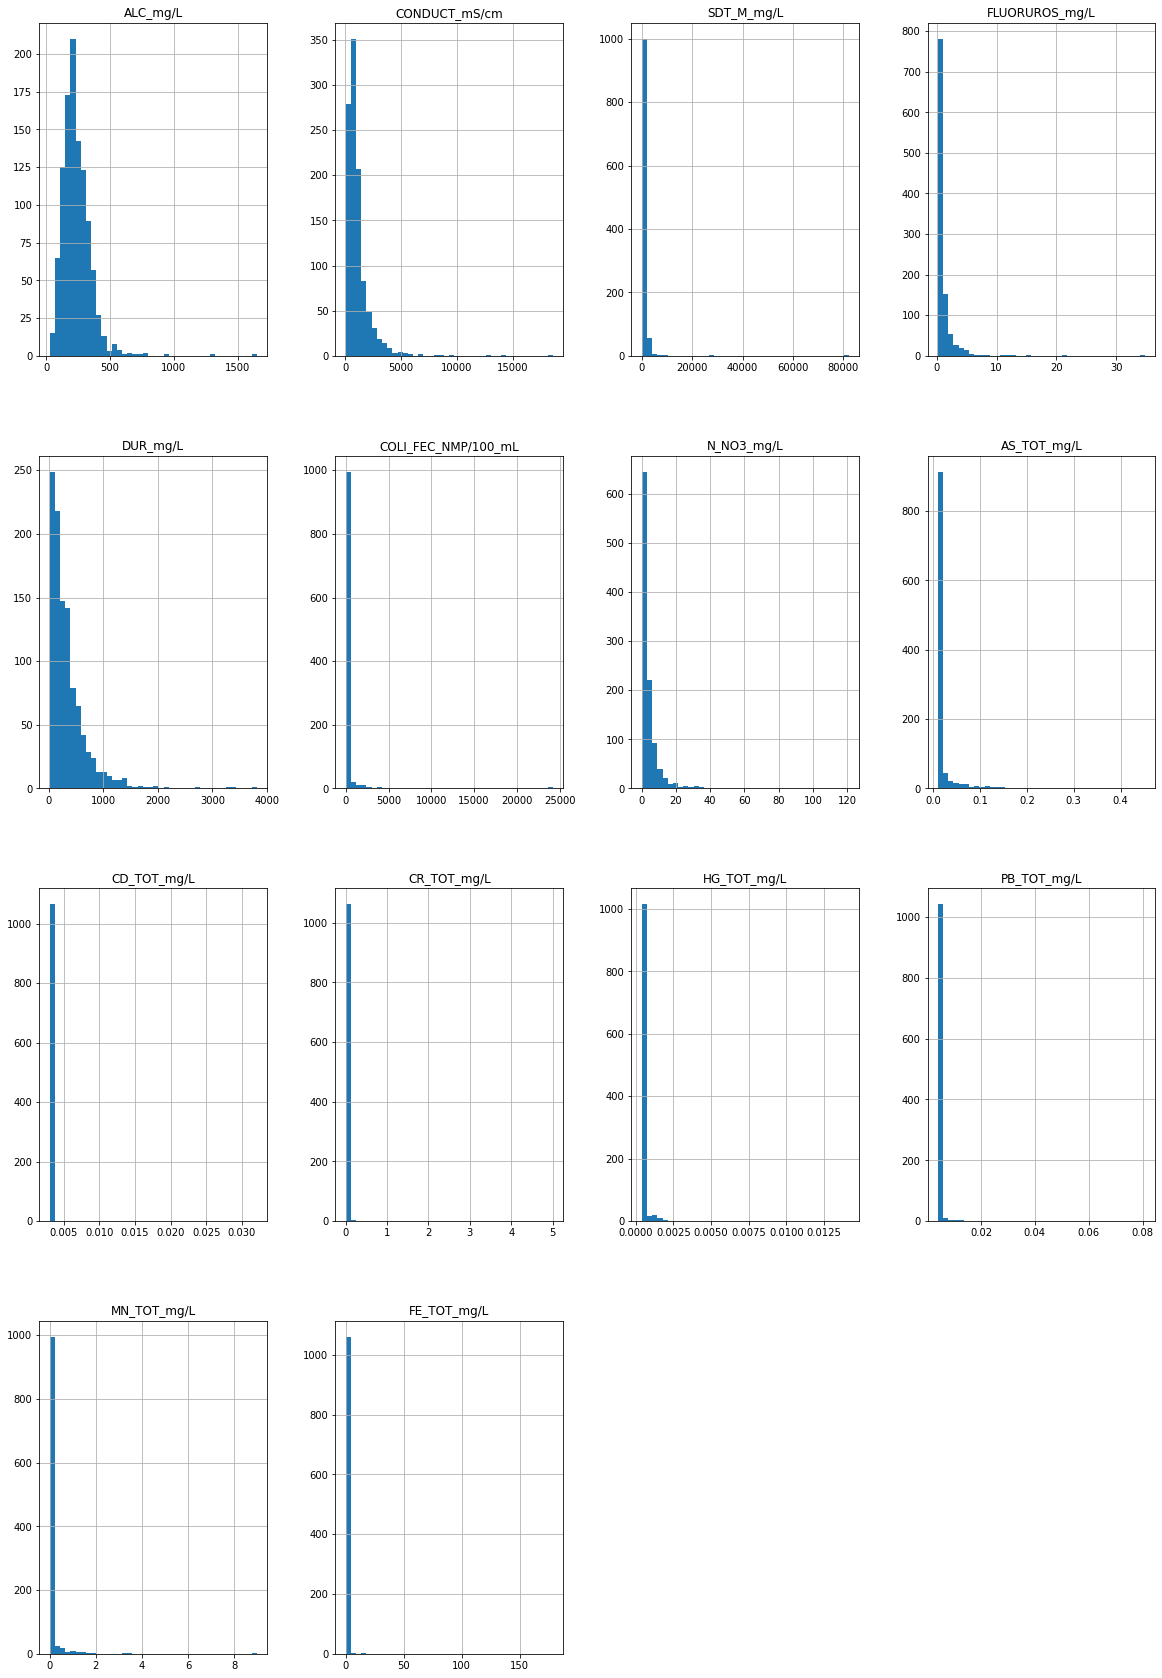

In [ ]:
#Impresión de gráficos
df_agua_sub_num.hist(bins = 40, figsize=(20,30))
#La función se llama en cada serie en el DataFrame, lo que da como resultado un histograma por columna. 
#La función hist () se utiliza para crear un histograma, que aclara la idea de la distribución de ciertas 
#variables numéricas del conjunto de datos.

In [ ]:
df_agua_sub_num.isnull().sum().sort_values(ascending = False)

CONDUCT_mS/cm          6
ALC_mg/L               4
SDT_M_mg/L             2
DUR_mg/L               1
N_NO3_mg/L             1
FLUORUROS_mg/L         0
COLI_FEC_NMP/100_mL    0
AS_TOT_mg/L            0
CD_TOT_mg/L            0
CR_TOT_mg/L            0
HG_TOT_mg/L            0
PB_TOT_mg/L            0
MN_TOT_mg/L            0
FE_TOT_mg/L            0
dtype: int64

In [ ]:
#class sklearn.impute.SimpleImputer(*, missing_values=nan, strategy='mean', fill_value=None, verbose='deprecated', copy=True, add_indicator=False)[source]

col_num= ['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L'] #sin ,'SDT_mg/L'


for name in col_num:
  mediana = df_agua_sub_num[name].median() 
  df_agua_sub_num[name]= df_agua_sub_num[name].replace(np.nan, mediana)

df_agua_sub_num.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1068 non-null   float64
 1   CONDUCT_mS/cm        1068 non-null   float64
 2   SDT_M_mg/L           1068 non-null   float64
 3   FLUORUROS_mg/L       1068 non-null   float64
 4   DUR_mg/L             1068 non-null   float64
 5   COLI_FEC_NMP/100_mL  1068 non-null   float64
 6   N_NO3_mg/L           1068 non-null   float64
 7   AS_TOT_mg/L          1068 non-null   float64
 8   CD_TOT_mg/L          1068 non-null   float64
 9   CR_TOT_mg/L          1068 non-null   float64
 10  HG_TOT_mg/L          1068 non-null   float64
 11  PB_TOT_mg/L          1068 non-null   float64
 12  MN_TOT_mg/L          1068 non-null   float64
 13  FE_TOT_mg/L          1068 non-null   float64
dtypes: float64(14)
memory usage: 116.9 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [ ]:
df_agua_sub_num.describe().T

,count,mean,std,min,25%,50%,75%,max
ALC_mg/L,1068.0,235.558455,116.661485,26.6400,164.048750,215.527500,292.423750,1650.000000
CONDUCT_mS/cm,1068.0,1137.133052,1242.292889,50.4000,505.500000,815.000000,1321.250000,18577.000000
SDT_M_mg/L,1068.0,895.454185,2748.991295,25.0000,337.700000,550.400000,915.900000,82170.000000
FLUORUROS_mg/L,1068.0,1.075600,1.924278,0.2000,0.267175,0.503500,1.139850,34.803300
DUR_mg/L,1068.0,347.842003,359.514579,20.0000,121.274100,245.335800,453.930000,3810.692200
COLI_FEC_NMP/100_mL,1068.0,355.490356,2052.457014,1.1000,1.100000,1.100000,13.250000,24196.000000
N_NO3_mg/L,1068.0,4.317663,8.341504,0.0200,0.650932,2.080932,5.200047,121.007813
AS_TOT_mg/L,1068.0,0.019618,0.035209,0.0100,0.010000,0.010000,0.010000,0.452200
CD_TOT_mg/L,1068.0,0.003030,0.000894,0.0030,0.003000,0.003000,0.003000,0.032110
CR_TOT_mg/L,1068.0,0.012476,0.154435,0.0040,0.004000,0.004000,0.004000,5.003200


Analizando las variables uno vez limpios e imputados los datos del Dataset, encontramos lo siguiente:

* Encontramos que hay valores con mínimos y máximos muy separados como lo son: ALC_mg/L, CONDUCT_mS/cm, SDT_M_mg/L, DUR_mg/L y COLI_FEC_NMP/100_mL --> *Revisar Outliers*

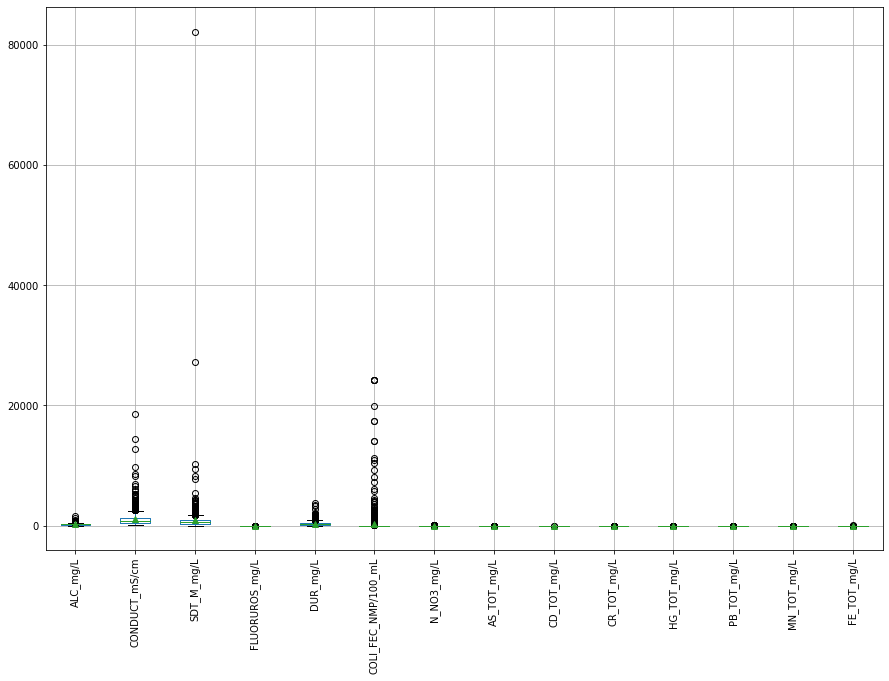

In [ ]:
outliers = df_agua_sub_num.boxplot(figsize = (15,10),showmeans = True)
outliers.plot()
plt.xticks(rotation=90)
#plt.ylim(0, 4)
plt.show()

Decidimos eliminar dos de los registros que presentaban outliers muy lejanos para nuestra variable **SDT_M_mg/L**, debido a que se encuentran muy fuera del rango normal establecido por la tabla de determinación de calidad, además de no estar nada cercano a los demás valores de la variable.

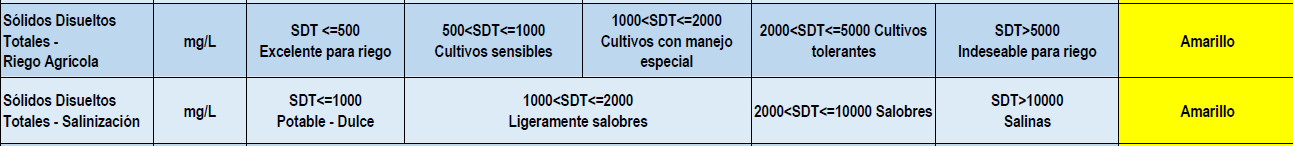

In [ ]:
df_agua_sub_num.loc[df_agua_sub_num['SDT_M_mg/L'] > 25000]


,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
37,208.68,2860.0,27215.8,0.3848,672.4172,63.0,5.869769,0.01,0.003,0.00710,0.0004,0.004,0.00800,0.49690
740,304.00,2704.0,82170.0,0.5169,1339.0000,9.0,1.955000,0.01,0.003,0.00652,0.0005,0.005,0.00696,0.09777


In [ ]:
#Revisar si es factible eliminar outliers
df_agua_sub_num.drop([740],axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#Revisar si es factible eliminar outliers
df_agua_sub_num.drop([37],axis=0, inplace=True)

### Salida

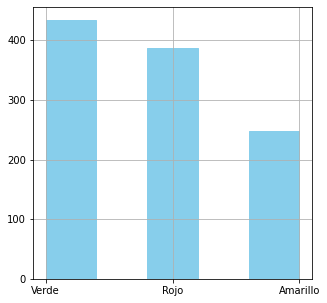

In [ ]:
#Semáforo de calidad del agua {Verde:  }
y = pd.DataFrame(df_agua_sub['SEMAFORO'])
y['SEMAFORO'].hist(bins = 5, histtype ='barstacked', color = "skyblue", ec="skyblue", figsize=(5,5))

Porcentaje de las salidas

In [ ]:
y.value_counts()
print('Verde: '     +  str(434/y.value_counts().sum() * 100) + '%')
print('Rojo: '      +  str(387/y.value_counts().sum() * 100) + '%')
print('Amarillo: ' +  str(247/y.value_counts().sum() * 100) + '%')

Verde: 40.63670411985019%
Rojo: 36.235955056179776%
Amarillo: 23.127340823970037%


### Correlación de Variables Independientes

In [ ]:
df_agua_sub_num.columns

Index(['ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L',
       'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L',
       'CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L',
       'FE_TOT_mg/L'],
      dtype='object')

In [ ]:
#Vemos la matriz de correlacion
df_agua_sub_num.corr()

,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
ALC_mg/L,1.000000,0.217216,0.213802,0.068962,0.243089,-0.016279,-0.000150,0.073568,0.032723,-0.014223,0.069724,0.016859,0.130029,0.043497
CONDUCT_mS/cm,0.217216,1.000000,0.782028,-0.024302,0.692092,0.018438,0.220349,-0.004375,0.029214,0.004534,0.057201,0.024733,0.096532,0.083357
SDT_M_mg/L,0.213802,0.782028,1.000000,-0.007915,0.862077,0.015909,0.352206,-0.000171,0.039330,0.002910,0.064294,-0.007781,0.082840,0.070398
FLUORUROS_mg/L,0.068962,-0.024302,-0.007915,1.000000,-0.149098,0.003470,-0.019689,0.443988,-0.015144,-0.005228,-0.028629,-0.034170,-0.049853,-0.010005
DUR_mg/L,0.243089,0.692092,0.862077,-0.149098,1.000000,0.032459,0.303373,-0.105905,0.025224,0.007476,0.065195,-0.017831,0.084802,0.060160
COLI_FEC_NMP/100_mL,-0.016279,0.018438,0.015909,0.003470,0.032459,1.000000,-0.000946,0.038074,-0.001666,-0.008949,-0.008911,0.021473,-0.005377,0.003039
N_NO3_mg/L,-0.000150,0.220349,0.352206,-0.019689,0.303373,-0.000946,1.000000,-0.007975,-0.009357,-0.015162,0.011411,-0.017248,-0.036830,0.013290
AS_TOT_mg/L,0.073568,-0.004375,-0.000171,0.443988,-0.105905,0.038074,-0.007975,1.000000,-0.009096,-0.009718,-0.012612,-0.023581,0.016829,0.014285
CD_TOT_mg/L,0.032723,0.029214,0.039330,-0.015144,0.025224,-0.001666,-0.009357,-0.009096,1.000000,-0.001826,-0.004633,-0.003076,-0.004215,-0.001038
CR_TOT_mg/L,-0.014223,0.004534,0.002910,-0.005228,0.007476,-0.008949,-0.015162,-0.009718,-0.001826,1.000000,0.006996,-0.001144,-0.005124,0.000608


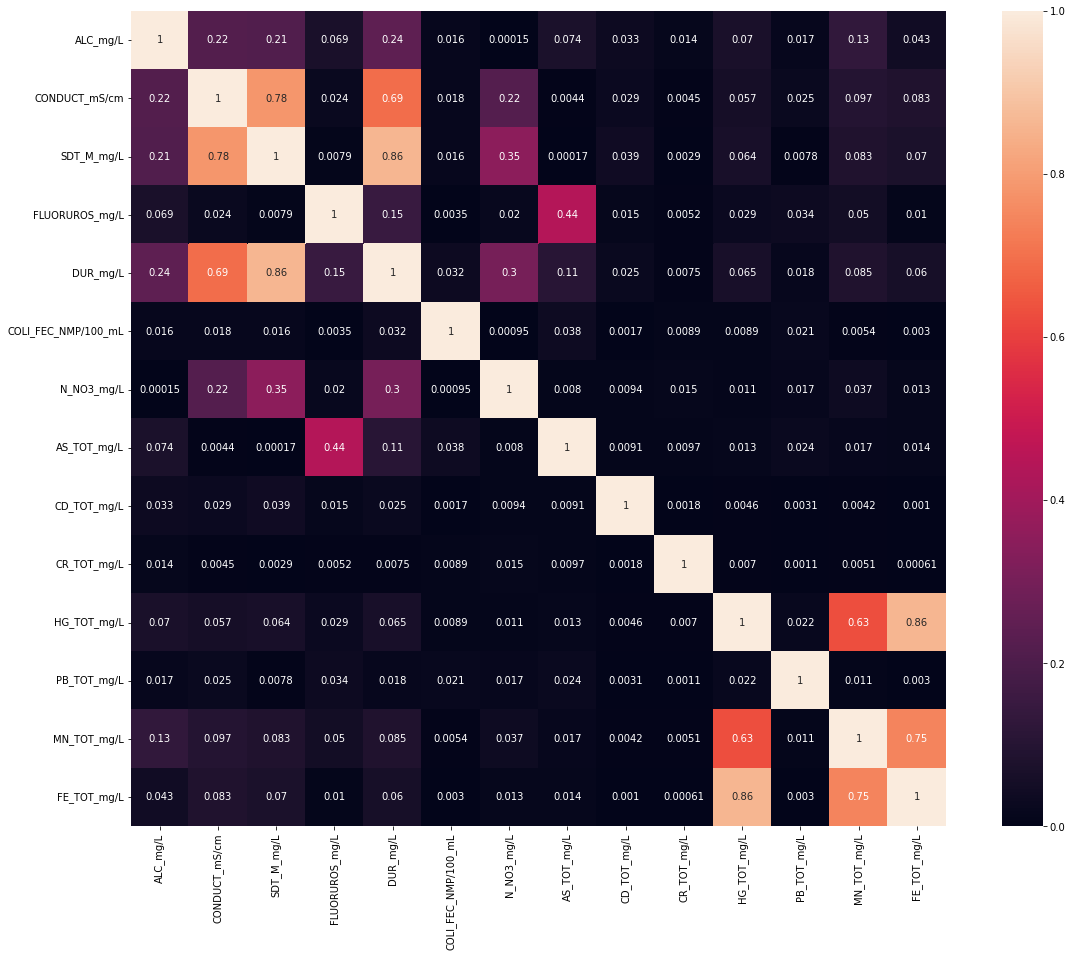

In [ ]:
correlacion = df_agua_sub_num.corr().abs() #El abs nos permite analizar la correlación sin importar que sea directa o indirecta

f, ax = plt.subplots(figsize = (20,15)) #Definir el área de trabajo.

sns.heatmap(correlacion, vmax = 1, vmin = 0, square = True, annot = True)


De la correlación entre variables independientes encontramos lo siguiente:
* **FE_TOT_mg/L** tiene una alta correlación con **HG_TOT_mg/L (0.86)** y con **MN_TOT_mg/L (0.75)**. --> Por lo que en algún momento podríamos utilizar solo 1 de las tres variables en nuestro modelo.

* **DUR_mg/L** tiene una alta correlación con **SDT_M_mg/L (0.86)** y con **COLI_FEC_NMP/100_mL (0.69)**

* **COLI_FEC_NMP/100_mL** tiene alta correlación con **SDT_M_mg/L (0.78)**

### Correlación con Variable Dependiente

In [ ]:
df_dep = pd.DataFrame(columns = df_agua_sub_num.columns)
df_dep = df_agua_sub_num.copy()
#df_dep['SEMAFORO'] = y['SEMAFORO']
df_dep

,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
0,229.990,940.0,603.6000,0.9766,213.7320,1.1,4.184656,0.0161,0.003,0.004,0.0004,0.004,0.00150,0.08910
1,231.990,608.0,445.4000,0.9298,185.0514,1.1,5.750110,0.0134,0.003,0.004,0.0004,0.004,0.00150,0.02500
2,204.920,532.0,342.0000,1.8045,120.7190,1.1,1.449803,0.0370,0.003,0.004,0.0004,0.004,0.00150,0.02500
3,327.000,686.0,478.6000,1.1229,199.8790,1.1,1.258597,0.0154,0.003,0.005,0.0004,0.004,0.00150,0.02500
4,309.885,1841.0,1179.0000,0.2343,476.9872,291.0,15.672251,0.0100,0.003,0.004,0.0004,0.004,0.00150,0.02500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,231.045,2350.0,1545.8000,0.2000,752.0960,1.1,14.615488,0.0100,0.003,0.004,0.0004,0.004,0.00150,0.02500
1064,256.000,529.0,297.0000,0.2000,273.0000,1.1,77.392000,0.0100,0.003,0.004,0.0004,0.004,0.00709,0.07578
1065,330.690,2600.0,1873.0000,0.7574,660.2126,620.0,36.477104,0.0100,0.003,0.004,0.0004,0.004,0.02420,0.21290
1066,193.140,873.0,690.6667,0.7108,406.3680,1.1,0.020000,0.0100,0.003,0.004,0.0004,0.004,0.01200,0.17860


In [ ]:
df_dummies = pd.get_dummies(y['SEMAFORO'])
df_dummies

,Amarillo,Rojo,Verde
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,0
...,...,...,...
1063,0,1,0
1064,0,1,0
1065,0,1,0
1066,0,0,1


In [ ]:
df_dep = pd.concat([df_dep, df_dummies], axis=1)

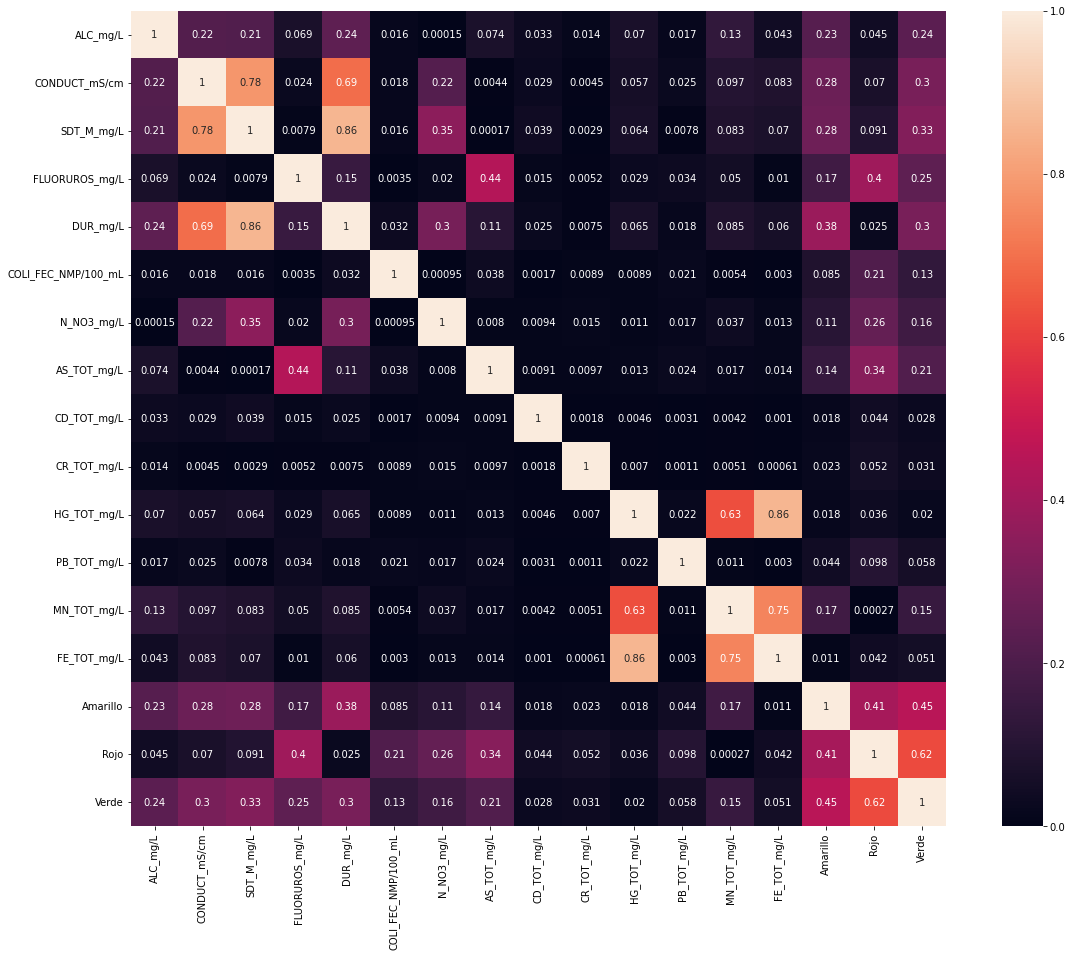

In [ ]:
var_dep_corr = df_dep.corr().abs()

f, ax = plt.subplots(figsize = (20,15)) #Definir el área de trabajo.

sns.heatmap(var_dep_corr, vmax = 1, vmin = 0, square = True, annot = True)

Las variables dependientes que más impacto tienen con las variables independientes son:

**'ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L','COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L' y  MN_TOT_mg/L**

Debemos de considerarlas al momento de seleccionar las variables de nuestor modelo

### Preparación de los datos

**Análisis de Componentes Principales (PCA)**

In [ ]:
scaler = StandardScaler() #Definimos variable scaler que almacena el método StandardScaler().
scaled_agua = scaler.fit_transform(df_agua_sub_num) #scaled va a almacenar los valor

scaled_df_agua = pd.DataFrame(scaled_agua, columns=df_agua_sub_num.columns)

Veamos la distribución de nuestros datos una vez escalados 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efeae922ad0>,
      dtype=object)

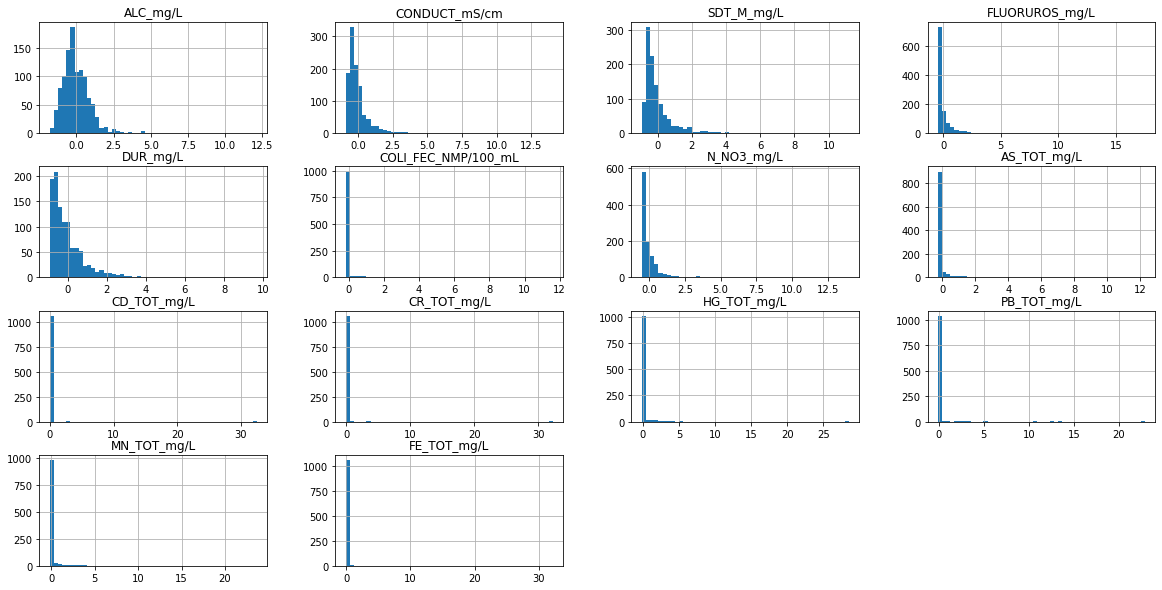

In [ ]:
#Impresión de gráficos
scaled_df_agua.hist(bins = 50, figsize=(20,10))

In [ ]:
from sklearn.decomposition import PCA
pcs_agua_sub = PCA() #Creamos variable pcs que almacena el método PCA().

pcs_agua = pcs_agua_sub.fit_transform(scaled_df_agua) ##variable pcs_agua_sub almacena los valores ajustados de la transformación de pcs a nuestro DataFrame Escalado

In [ ]:
scaled_df_agua

,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
0,-0.047384,-0.156386,-0.226996,-0.052038,-0.370892,-0.172881,-0.016030,-0.100389,-0.03325,-0.054926,-0.13935,-0.092522,-0.188755,-0.058027
1,-0.030245,-0.423950,-0.415089,-0.076349,-0.450947,-0.172881,0.171563,-0.177042,-0.03325,-0.054926,-0.13935,-0.092522,-0.188755,-0.069596
2,-0.262219,-0.485200,-0.538027,0.378043,-0.630517,-0.172881,-0.343755,0.492967,-0.03325,-0.054926,-0.13935,-0.092522,-0.188755,-0.069596
3,0.783932,-0.361089,-0.375615,0.023963,-0.409560,-0.172881,-0.366667,-0.120262,-0.03325,-0.048454,-0.13935,-0.092522,-0.188755,-0.069596
4,0.637267,0.569745,0.457128,-0.437650,0.363924,-0.031699,1.360560,-0.273569,-0.03325,-0.054926,-0.13935,-0.092522,-0.188755,-0.069596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,-0.038343,0.979957,0.893236,-0.455469,1.131828,-0.172881,1.233925,-0.273569,-0.03325,-0.054926,-0.13935,-0.092522,-0.188755,-0.069596
1062,0.175506,-0.487617,-0.591529,-0.455469,-0.205459,-0.172881,8.756606,-0.273569,-0.03325,-0.054926,-0.13935,-0.092522,-0.173915,-0.060431
1063,0.815553,1.181436,1.282262,-0.165908,0.875356,0.128525,3.853662,-0.273569,-0.03325,-0.054926,-0.13935,-0.092522,-0.128491,-0.035682
1064,-0.363166,-0.210382,-0.123478,-0.190116,0.166807,-0.172881,-0.515092,-0.273569,-0.03325,-0.054926,-0.13935,-0.092522,-0.160880,-0.041873


Crearemos una variable con las etiquetas de cada Componente Principal (PC)

In [ ]:
pcs_labels = [f'PC{i + 1}' for i in range(len(scaled_df_agua.columns))] 
pcs_labels

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14']

Crearemos una variable que almacenará el DataFrame con nuestros componentes en relación de la Desviación estándar, Proporción de varianza y Proporción Acumulada

In [ ]:
pcsSummary_df_agua = pd.DataFrame({'Desviación estándar': np.sqrt(pcs_agua_sub.explained_variance_),
                             'Proporción de varianza': pcs_agua_sub.explained_variance_ratio_,
                             'Proporción Acumulada': np.cumsum(pcs_agua_sub.explained_variance_ratio_)
                             })

pcsSummary_df_agua = pcsSummary_df_agua.T
pcsSummary_df_agua.columns = pcs_labels
pcsSummary_df_agua.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Desviación estándar,1.7123,1.5425,1.2181,1.0189,1.0131,1.0013,0.9940,0.9711,0.8743,0.7477,0.6096,0.5490,0.3395,0.3295
Proporción de varianza,0.2092,0.1698,0.1059,0.0741,0.0732,0.0715,0.0705,0.0673,0.0546,0.0399,0.0265,0.0215,0.0082,0.0077
Proporción Acumulada,0.2092,0.3790,0.4849,0.5590,0.6322,0.7038,0.7743,0.8416,0.8961,0.9360,0.9625,0.9840,0.9923,1.0000


Si analizamos este % de varianza en los componentes principales,ahora vemos cómo tiene un mayor impacto los componentes yendo del primer componente con más % de varianza, hasta llegar a 100%


In [ ]:
pcsSummary_df_agua = pd.DataFrame({'% varianza explicada': np.round(pcs_agua_sub.explained_variance_ratio_,4) * 100,
                                    '% varianza acumulada': np.cumsum(pcs_agua_sub.explained_variance_ratio_) * 100},
                                    index = pcs_labels)
pcsSummary_df_agua

,% varianza explicada,% varianza acumulada
PC1,20.92,20.922778
PC2,16.98,37.901380
PC3,10.59,48.489662
PC4,7.41,55.898031
PC5,7.32,63.222037
PC6,7.15,70.376173
PC7,7.05,77.426697
PC8,6.73,84.155882
PC9,5.46,89.611066
PC10,3.99,93.600483


* Con 7 componentes ya cumplimos con el **77.42%** de varianza acumulada.
* Con 8 componentes cumplimos con el **84.15%** de varianza acumulada.

>Por lo tanto, sólo necesitamos de 6 a 8 componentes para alimentar nuestro modelo.

In [ ]:
pcsComponents_df_agua = pd.DataFrame(pcs_agua_sub.components_.round(4),#datos pcs.components nos da los pesos de cada uno de los componentes
                                columns=pcs_labels,#columnas Son 14 columnas, las cuales hacen referencia a cada uno de los componentes: PC1, PC2...PC10
                                index=scaled_df_agua.columns #índice (ID) Las filas son 10 también, las cuales hacen referencia a las variables originales
                                )
pcsComponents_df_agua

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
ALC_mg/L,0.1976,0.4530,0.4908,-0.0600,0.4779,0.0123,0.2154,-0.0316,0.0246,0.0011,0.2746,0.0027,0.2763,0.2880
CONDUCT_mS/cm,-0.0398,-0.2416,-0.2777,0.0141,-0.2689,-0.0151,-0.1725,0.0311,-0.0217,0.0004,0.5078,0.0067,0.4701,0.5293
SDT_M_mg/L,0.2163,0.0574,0.0604,0.6829,-0.0629,0.0494,-0.0055,0.6836,-0.0139,-0.0285,-0.0201,-0.0683,0.0011,0.0020
FLUORUROS_mg/L,0.4953,0.0497,-0.0385,-0.0592,-0.0014,0.0161,-0.4483,-0.0464,0.5475,-0.0416,-0.0437,0.4855,0.0234,-0.0650
DUR_mg/L,-0.1551,0.0174,0.0022,-0.0151,-0.0009,0.7324,0.0701,0.0487,-0.3099,-0.2181,0.0178,0.5358,-0.0207,0.0204
COLI_FEC_NMP/100_mL,0.0010,0.0396,0.0128,0.0320,0.0112,-0.0024,-0.0879,0.0240,-0.2287,0.9322,0.0061,0.2592,-0.0142,-0.0069
N_NO3_mg/L,-0.2198,-0.0215,0.0111,-0.0156,0.0095,0.5821,0.0432,0.0281,0.6076,0.2690,0.0097,-0.4080,-0.0001,0.0343
AS_TOT_mg/L,-0.4573,-0.0310,0.0310,0.1187,-0.0669,-0.3238,0.4739,0.1063,0.4254,0.0079,0.0707,0.4845,-0.0635,0.0694
CD_TOT_mg/L,0.6113,-0.2936,-0.1725,-0.0851,-0.1183,0.1148,0.6785,-0.0785,0.0130,0.0904,0.0214,-0.0100,-0.0074,-0.0208
CR_TOT_mg/L,-0.0162,-0.0182,-0.0298,-0.6907,0.0267,-0.0557,0.0095,0.7031,-0.0056,0.0087,-0.0897,-0.0030,0.1127,-0.0473


In [ ]:
pcsComponents_df_agua.abs().idxmax() #Nos interesa buscar los máximos por filas, no por columnas. Por eso usamos idxmax
#Si quisieramos especidicar en una sola columna, llamaríamos el nombre del componente (PCA1)

PC1             CD_TOT_mg/L
PC2             PB_TOT_mg/L
PC3             FE_TOT_mg/L
PC4             CR_TOT_mg/L
PC5             PB_TOT_mg/L
PC6                DUR_mg/L
PC7             CD_TOT_mg/L
PC8             CR_TOT_mg/L
PC9              N_NO3_mg/L
PC10    COLI_FEC_NMP/100_mL
PC11            MN_TOT_mg/L
PC12               DUR_mg/L
PC13            HG_TOT_mg/L
PC14            MN_TOT_mg/L
dtype: object

In [ ]:
pcsComponents_df_agua.abs().idxmax().value_counts()

CD_TOT_mg/L            2
PB_TOT_mg/L            2
CR_TOT_mg/L            2
DUR_mg/L               2
MN_TOT_mg/L            2
FE_TOT_mg/L            1
N_NO3_mg/L             1
COLI_FEC_NMP/100_mL    1
HG_TOT_mg/L            1
dtype: int64

Vemos la importancia de las variables por cada uno de los componentes. Las variables **CD_TOT_mg/L, PB_TOT_mg/L,CR_TOT_mg/L, DUR_mg/L y MN_TOT_mg/L**. Son las que más importancia tienen en el total de Componentes Principales.

De igual forma **FE_TOT_mg/L** se encuentra como principal opción para el *PC3*, debemos de tomarlo en cuenta al momento de alimentar nuestro modelo.

## **K means**

Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means. Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.

### Representación de Clusters en mapa de México

In [ ]:
df_ubi = df_agua_sub[['LONGITUD','LATITUD']]

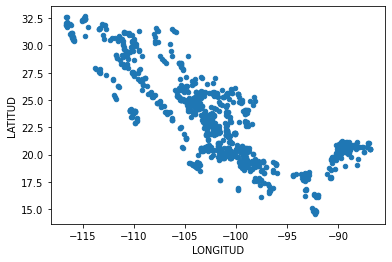

In [ ]:
#Vamos a ver las coordenandas de nuetro data frame en el mapa geopandas

df_ubi.plot.scatter('LONGITUD','LATITUD')


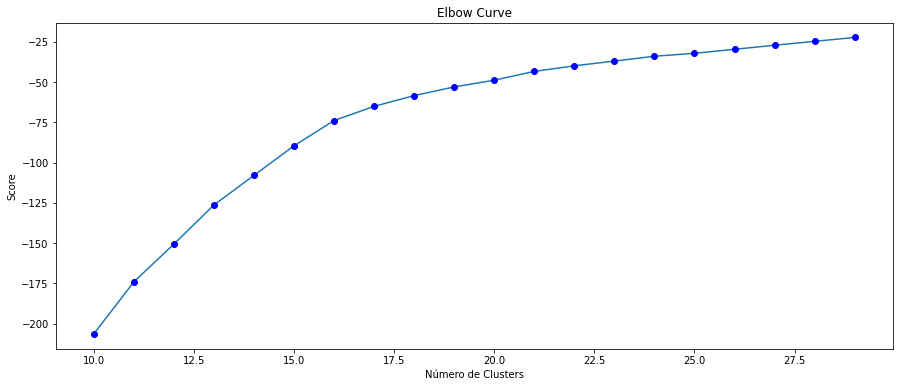

In [ ]:
from sklearn.cluster import KMeans

#Definimos un rango de clusters grandes para ver el comportamiento
K_clusters = range(10,30)

#Evaluación individual de cada cluster
mi_kmeans = [KMeans(n_clusters=i) for i in K_clusters]

#Definimos los ejes
Y_axis = df_ubi[['LATITUD']]
X_axis = df_ubi[['LONGITUD']]

#Valores por cada uno de los k_means más cercanos
score = [mi_kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(mi_kmeans))]

#Graficamos los datos
plt.figure(figsize=(15,6))
plt.plot(K_clusters, score)
plt.plot(K_clusters, score, 'o', color="b")
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


In [ ]:
#No tenemos columna de las coordenadas, tenemos que crearla para poder  meterlas al geopandas
df_ubi
df_ubi["COORDENADAS"] = list(zip(df_ubi.LONGITUD, df_ubi.LATITUD))
df_ubi["COORDENADAS"] = df_ubi["COORDENADAS"].apply(Point)
df_ubi.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,LONGITUD,LATITUD,COORDENADAS
0,-102.02210,22.20887,POINT (-102.0221 22.20887)
1,-102.20075,21.99958,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,POINT (-110.2448 23.45138)


In [ ]:
X = df_agua_sub[['LONGITUD','LATITUD']]

#Utilizaré 16 clusters, viendo que es cuando la variabilidad de la pendiente disminuye bastante.

#Ajustamos los resultados
kmeans = KMeans(n_clusters=16).fit(X)
centroids = kmeans.cluster_centers_

#Ahora guardamos los resultados
labels = kmeans.predict(X)

#Obteniendo los centros de cada cluster
C = kmeans.cluster_centers_

C_DF = pd.DataFrame(C)
C_DF["Coordinates"] = list(zip(C_DF[0], C_DF[1]))
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point) 


gdf_C = gpd.GeoDataFrame(C_DF, geometry="Coordinates")
gdf_C



,0,1,Coordinates
0,-107.534814,24.697606,POINT (-107.53481 24.69761)
1,-99.414785,19.753733,POINT (-99.41479 19.75373)
2,-110.780776,29.898283,POINT (-110.78078 29.89828)
3,-89.188374,20.546897,POINT (-89.18837 20.54690)
4,-99.681246,24.201324,POINT (-99.68125 24.20132)
5,-115.251913,31.614292,POINT (-115.25191 31.61429)
6,-92.761627,17.004097,POINT (-92.76163 17.00410)
7,-103.603893,19.996733,POINT (-103.60389 19.99673)
8,-104.615299,24.957509,POINT (-104.61530 24.95751)
9,-102.390595,22.650115,POINT (-102.39059 22.65011)


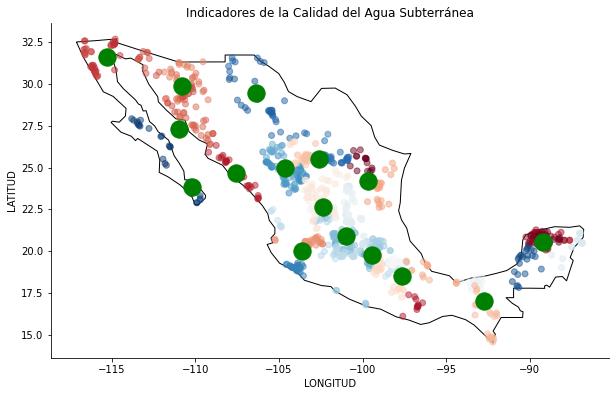

In [ ]:
#Generamos los puntos en el mapa
puntos_en_mapa = gpd.GeoDataFrame(df_ubi, geometry="COORDENADAS")

#Generamos el mapa
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
world.name.unique()

fig, gax = plt.subplots(figsize=(10,10))

#Seleccionamos México
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

# Declaramos los ejes X y Y
gax.set_xlabel('LONGITUD')
gax.set_ylabel('LATITUD')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
gax.set_title('Indicadores de la Calidad del Agua Subterránea')

#Imprimimos todos los puntos
puntos_en_mapa.plot(ax=gax, cmap='RdBu_r', alpha = 0.5)
#Imprimimos los clusters
gdf_C.plot(ax=gax, color='green', alpha = 1, markersize = 300) #Graficamos los puntos principales encontrados con el Kmean


### Clusters y puntos en color para mapa de México

Asignaremos un número de cluster [0-16] para cada uno de los puntos en el mapa.

In [ ]:
puntos_en_mapa['COLOR']= y['SEMAFORO']
puntos_en_mapa['CLUSTER'] = labels

puntos_en_mapa

,LONGITUD,LATITUD,COORDENADAS,COLOR,CLUSTER
0,-102.02210,22.20887,POINT (-102.02210 22.20887),Verde,9
1,-102.20075,21.99958,POINT (-102.20075 21.99958),Verde,9
2,-102.28801,22.36685,POINT (-102.28801 22.36685),Rojo,9
3,-102.29449,22.18435,POINT (-102.29449 22.18435),Verde,9
4,-110.24480,23.45138,POINT (-110.24480 23.45138),Rojo,14
...,...,...,...,...,...
1063,-99.54191,24.76036,POINT (-99.54191 24.76036),Rojo,4
1064,-99.70099,24.78280,POINT (-99.70099 24.78280),Rojo,4
1065,-99.82249,25.55197,POINT (-99.82249 25.55197),Rojo,4
1066,-100.32683,24.80118,POINT (-100.32683 24.80118),Verde,4


El **nuevo_dataset** almacena los datos de los puntos en el mapa para cada cluster

In [ ]:
lista_de_modas=[]

for i in range(0,16): # Recorremos 16  veces
  nuevo_dataset = pd.DataFrame() #Creamos un dataframe vacío

  #Se copia cada sección del DataFrame según el Cluster
  nuevo_dataset = puntos_en_mapa[puntos_en_mapa.CLUSTER == i].copy()
  
  #Aquí creamos la moda de cada color
  moda = nuevo_dataset['COLOR'].mode()[0] 

  #Vamos añadiendo la moda, nos va a dar una lista de 16 elementos
  lista_de_modas.append(moda) 

len(lista_de_modas)

16

In [ ]:
#Ahora sumamos la columna de moda por cluster al data set de clusters
gdf_C['MODA'] = lista_de_modas
gdf_C.shape

(16, 4)

In [ ]:
gdf_C['MODA']

0     Amarillo
1        Verde
2        Verde
3     Amarillo
4     Amarillo
5     Amarillo
6        Verde
7         Rojo
8         Rojo
9         Rojo
10        Rojo
11        Rojo
12       Verde
13       Verde
14        Rojo
15       Verde
Name: MODA, dtype: object

In [ ]:
gdf_C['MODA'].value_counts()

Verde       6
Rojo        6
Amarillo    4
Name: MODA, dtype: int64

In [ ]:
puntos_en_mapa['COLOR'].value_counts()

Verde       434
Rojo        387
Amarillo    247
Name: COLOR, dtype: int64

In [ ]:
#Se debe de convertir la lista de Español a Inglés para que geopandas pueda leerla.
#Esto sería para la lista de modas que sólo tiene 16 valores
list_col_EN = []

for i in range(0,16):
  if lista_de_modas[i] == 'Verde':
    list_col_EN.append('green')
  if lista_de_modas[i] == 'Rojo':
    list_col_EN.append('red')
  if lista_de_modas[i] == 'Amarillo':
    list_col_EN.append('yellow')

len(list_col_EN)

16

In [ ]:
puntos_en_mapa.shape

(1068, 5)

In [ ]:
# Esta lista sería para cada uno de los 1068 valores de nuestro registro
list_col_EN_individual = []

for i in range(0,1068):
  if puntos_en_mapa.COLOR[i] == 'Verde':
    list_col_EN_individual.append('green')
  if puntos_en_mapa.COLOR[i] == 'Rojo':
    list_col_EN_individual.append('red')
  if puntos_en_mapa.COLOR[i] == 'Amarillo':
    list_col_EN_individual.append('yellow')

len(list_col_EN_individual)

1068

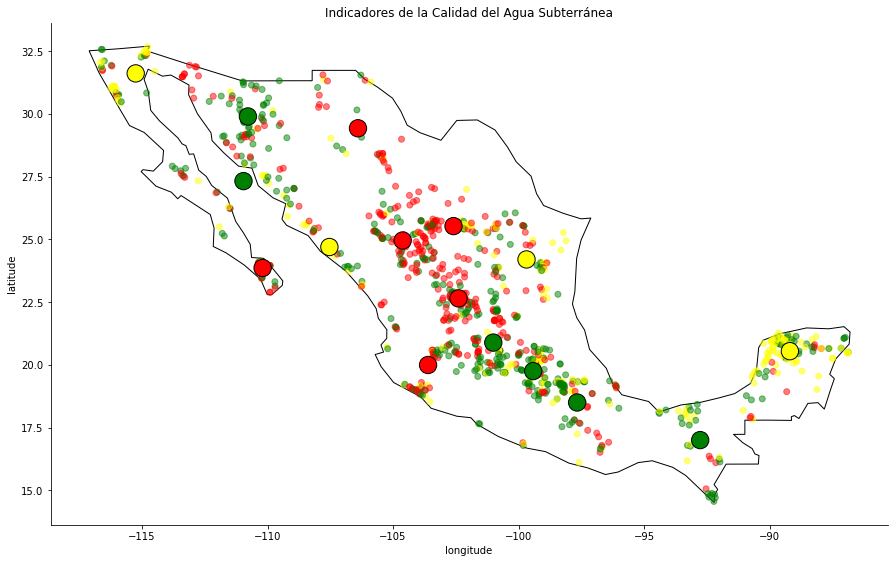

In [ ]:
#ahora visualizaremos los centroides ajustando el color de la moda
fig, gax = plt.subplots(figsize=(15,10)) #Espacio de gráfico

color_asig = []

#Se van agregando los colores
for row in range(0,len(list_col_EN)):
  color_asig.append(list_col_EN[row])

#Seleccionamos el mapa de México
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white') #filtramos por pais

#Todos los puntos se imprimen usando su color de Semáforo
puntos_en_mapa.plot(ax=gax, color=list_col_EN_individual, alpha = 0.5)

#Se imprimen los clusters usando el color de la moda
gdf_C.plot(ax=gax, color=color_asig, alpha = 1, markersize = 300, edgecolor='black') 

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Indicadores de la Calidad del Agua Subterránea')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

## **Conclusiones**

- El proceso de limpieza de los datos es fundamental, dado que sí analizamos los datos sin ningún tipo de limpieza y calidad de datos los análisis no serán confiables, adicionalmente para la realización del análisis exploratorio se consideraron únicamente variables numéricas, por lo que debíamos garantizar que los datos realmente fuesen valores numéricos, y para ello se tuvo que reemplazar la cadena y/o símbolo '<' en algunos datos que se inferían cómo numéricos para el análisis, pero que con este símbolo los datos no estaban aptos para su uso. 
- Podemos definir a la calidad del dato cómo “datos aptos para el uso”, es decir que se puedan graficar, agregar, calcular estadísticas descriptivas como la *media, mediana, max, min, std y conteos para las columnas que consideramos numéricas*, entre otros, es por ello que sí los datos no son aptos para su uso, podemos concluir que no son datos usables, y que deberemos hacer un ejercicio exploratorio con Python u otras herramientas, como por ejemplo Open Refine - https://openrefine.org/ para identificar fácilmente errores sistemáticos tales como celdas en blanco, valores nulos, valores duplicados, valores no estandarizados, inconsistencias de ortografía, inconsistencias en tipos de datos, datos sucios, entre otros, para luego proceder a limpiar los datos y prepararlos para su uso.
- Con los gráficos de bigotes se evidenciaron *outliers muy lejanos y atípicos* para la variable **SDT_M_mg/L**, debido a que se encontraban fuera del rango normal establecido por la tabla de determinación de calidad, además de no estar nada cercano a los demás valores de la variable, por ello se estableció como límite el valor de la variable hasta 25000, y aquellos que datos que estaban fuera de este límite se eliminaron (2 registros) con el fin de que estos datos atípicos no afecten luego el análisis exploratorio de los datos y/o el modelo a desarrollarse.
- Se realizó un análisis de correlación de los datos con las variables independientes y dependientes con el fin de identificar que variables presentaban la mayor correlación, para tenerlas en cuenta en la formulación del modelo de predicción a implementarse. 
- Se realizó un análisis de componentes principales (PCA), en donde se seleccionaron aquellos componentes que más aportan al total de la varianza explicada, concluyendo que con 7 componentes se obtiene una varianza acumulada de **77.42%**, y con 8 componentes se obtienen una varianza acumulada de **84.15%**. Por lo anterior, tan sólo se requieren de 6 a 8 componentes para utilizar en el modelo a implementar, dado que normalmente se aconseja llegar al menos al 80% del total de varianza explicada. Llegar al **80%** significa reducción de dimensionalidad y del conjunto de datos original.
- Para determinar el número de clústeres a utilizar en el método de agrupamiento de k-means, se realizó un **gráfico de codos** en un rango de 10 a 30 en las abscisas, con el fin de determinar el valor en el eje X en el que la pendiente disminuya su valor y presente un cambio en la tendencia de la curva, que para en caso de nuestro análisis se identificó que este cambio se daba en el **valor 16** del eje X, es por ello que se tomo este valor como el valor del  número de clústeres a utilizar en el método de k-means.
- Se utilizaron **16 clústeres** para agrupar los datos, arrojando algunas relaciones de los grupos de clústeres, por ejemplo en la zonas Occidente y Noreste de México se identificó que es en donde se presentan la mayor cantidad de puntos rojos y de agrupaciones de los clústeres, dado que de los 16 clústeres en total se identificaron según la moda de estos: **6 rojos, 4 amarillos y 6 verdes**, de los cuales alrededor de 4 grupos de clústeres de color rojo, se encuentran en estos estados de México, indicando que la calidad del agua en esta ubicación geográfica es mala, es decir para la región **Noreste y Occidente**, consumen la peor agua de México.
- La mejor calidad del agua se puede ver representada según el análisis y el mapa de referencia del Diario oficial de la Federación, en parte del **Centro, Noroeste y el Sureste** de México, en algunos de sus estados posiblemente se consume la mejor agua de México, esto desde un análisis general de acuerdo al mapa obtenido y la comparación con el mapa dispuesto a continuación.

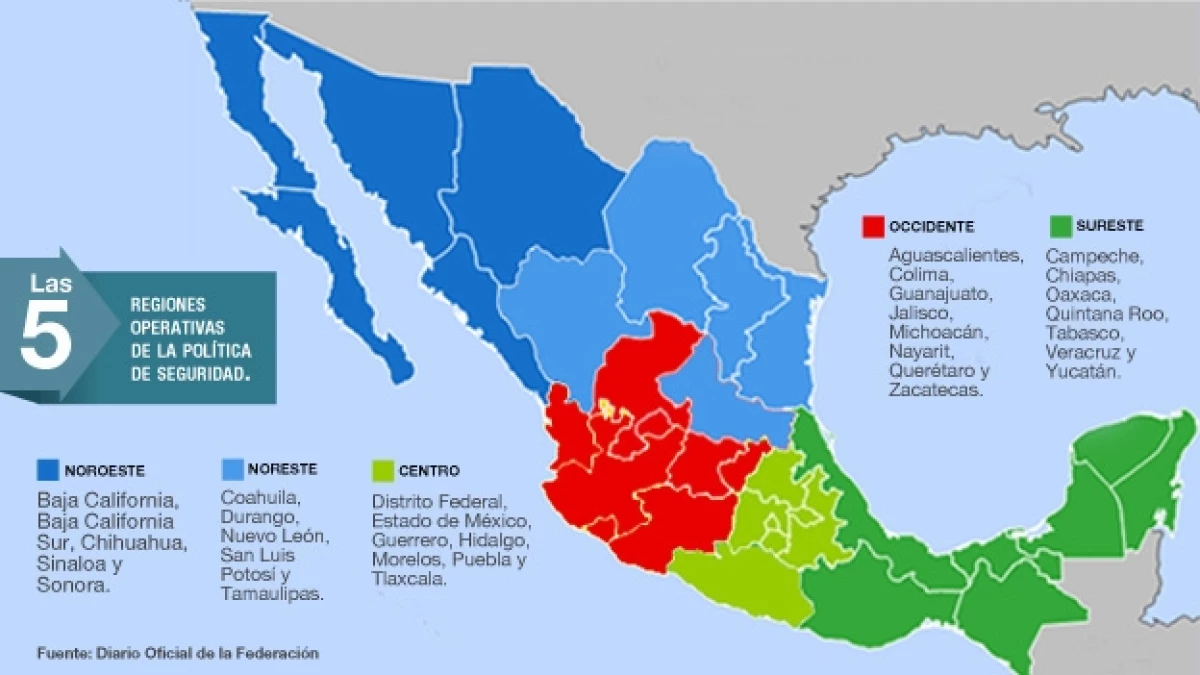